In [47]:
# faceMask hDDM face ratings analysis script: mask analyses of false negatives (failing to ID correct emotion)
# 12/07/20

# note: to be run within python 3.5 environment named "hddm" (from console: 'source activate hddm')
# confirm jupyter notebook is launching from "hddm" environment (see top-right: 'conda env:hddm')

# set up
import numpy as np
print(np.__version__) # should be 1.11.3

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from patsy import dmatrix

import hddm
print(hddm.__version__) # should be 0.6.0

1.11.3
0.6.0


In [48]:
# load hDDM-processed data from CSV file into a NumPy structured array
data = hddm.load_csv('faceMask_hddm_proc.csv')
                     
# flip 'no' response RTs to be negative
data = hddm.utils.flip_errors(data)

# check dataset
data.head(10)

subj_idx  block  faceList emotionRating  trial             stimulus  \
0  gc2le9xecjp1stz      0         3         angry      0  _faces/22_F_R_U.jpg   
1  gc2le9xecjp1stz      0         3         angry      1  _faces/07_M_H_L.jpg   
2  gc2le9xecjp1stz      0         3         angry      2  _faces/46_M_R_X.jpg   
3  gc2le9xecjp1stz      0         3         angry      3  _faces/47_M_S_L.jpg   
4  gc2le9xecjp1stz      0         3         angry      4  _faces/25_M_R_X.jpg   
5  gc2le9xecjp1stz      0         3         angry      5  _faces/27_F_A_U.jpg   
6  gc2le9xecjp1stz      0         3         angry      6  _faces/08_F_S_U.jpg   
7  gc2le9xecjp1stz      0         3         angry      7  _faces/38_M_H_X.jpg   
8  gc2le9xecjp1stz      0         3         angry      8  _faces/30_M_A_U.jpg   
9  gc2le9xecjp1stz      0         3         angry      9  _faces/04_F_R_U.jpg   

       face  model sex expression      mask  response        rt  faceAngry  \
0  22_F_R_U     22   F  surprised     upper         0 -4.636150          0   
1  07_M_H_L      7   M      happy     lower         0 -2.079460          0   
2  46_M_R_X     46   M  surprised  baseline         0 -1.847670          0   
3  47_M_S_L     47   M        sad     lower         0 -6.506275          0   
4  25_M_R_X     25   M  surprised  baseline         0 -1.536780          0   
5  27_F_A_U     27   F      angry     upper         1  1.906175         50   
6  08_F_S_U      8   F        sad     upper         0 -2.182530          0   
7  38_M_H_X     38   M      happy  baseline         0 -1.445230          0   
8  30_M_A_U     30   M      angry     upper         1  1.405270         50   
9  04_F_R_U      4   F  surprised     upper         0 -1.945385          0   

   faceDisgusted  faceFearful  faceHappy  faceSad  faceSurprised  
0              0            0          0        0             50  
1              0            0         50        0              0  
2              0            0          0        0            100  
3              0            0          0       50              0  
4              0            0          0        0            100  
5              0            0          0        0              0  
6              0            0          0       50              0  
7              0            0        100        0              0  
8              0            0          0        0              0  
9              0            0          0        0             50

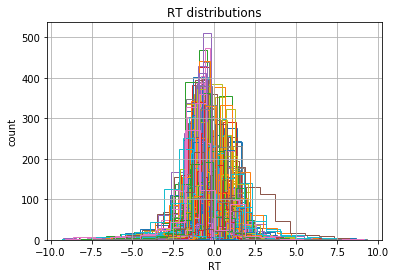

In [49]:
# plot RTs for each participant
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

In [4]:
# subset dataset by emotion rating type (sad) and facial expression (angry)
sa_data = data.loc[(data['emotionRating'] == 'sad') & (data['expression'] == 'angry')]
sa_data.head(10)

subj_idx  block  faceList emotionRating  trial  \
217  gc2le9xecjp1stz      2         1           sad    221   
224  gc2le9xecjp1stz      2         1           sad    228   
234  gc2le9xecjp1stz      2         1           sad    239   
240  gc2le9xecjp1stz      2         1           sad    245   
246  gc2le9xecjp1stz      2         1           sad    251   
250  gc2le9xecjp1stz      2         1           sad    255   
252  gc2le9xecjp1stz      2         1           sad    257   
260  gc2le9xecjp1stz      2         1           sad    265   
268  gc2le9xecjp1stz      2         1           sad    273   
270  gc2le9xecjp1stz      2         1           sad    275   

                stimulus      face  model sex expression      mask  response  \
217  _faces/16_F_A_L.jpg  16_F_A_L     16   F      angry     lower         1   
224  _faces/36_M_A_X.jpg  36_M_A_X     36   M      angry  baseline         0   
234  _faces/23_M_A_U.jpg  23_M_A_U     23   M      angry     upper         1   
240  _faces/32_F_A_X.jpg  32_F_A_X     32   F      angry  baseline         1   
246  _faces/23_M_A_L.jpg  23_M_A_L     23   M      angry     lower         1   
250  _faces/32_F_A_U.jpg  32_F_A_U     32   F      angry     upper         1   
252  _faces/01_F_A_L.jpg  01_F_A_L      1   F      angry     lower         0   
260  _faces/32_F_A_L.jpg  32_F_A_L     32   F      angry     lower         1   
268  _faces/01_F_A_U.jpg  01_F_A_U      1   F      angry     upper         0   
270  _faces/05_M_A_U.jpg  05_M_A_U      5   M      angry     upper         0   

           rt  faceAngry  faceDisgusted  faceFearful  faceHappy  faceSad  \
217  1.236080         50              0            0          0        0   
224 -8.006600        100              0            0          0        0   
234  1.515770         50              0            0          0        0   
240  1.075910        100              0            0          0        0   
246  1.251490         50              0            0          0        0   
250  1.235820         50              0            0          0        0   
252 -1.116135         50              0            0          0        0   
260  1.955635         50              0            0          0        0   
268 -1.250970         50              0            0          0        0   
270 -1.222755         50              0            0          0        0   

     faceSurprised  
217              0  
224              0  
234              0  
240              0  
246              0  
250              0  
252              0  
260              0  
268              0  
270              0

In [5]:
# drop any subjects missing columns in design matrix (otherwise produces error)
sa_data = sa_data[(sa_data.subj_idx != 'rc7s6vgpycw73ap') & (sa_data.subj_idx != 'ghupdz5y3s6k14a')]

In [6]:
# define model
m_sa = hddm.HDDMRegressor(sa_data, "v ~ C(mask)", bias=True, p_outlier=0.05)

Adding these covariates:
['v_Intercept', 'v_C(mask)[T.lower]', 'v_C(mask)[T.upper]']


 [-----------------100%-----------------] 5001 of 5000 complete in 49524.2 sec

C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-pack

                                         mean         std        2.5q         25q         50q         75q       97.5q       mc err
a                                     1.74399    0.637058     1.65748     1.70085      1.7242     1.75016     1.79916     0.018769
a_std                                0.503225    0.931942    0.416857    0.452887    0.472619    0.493246    0.538728    0.0292888
a_subj.02hcv424u29nd5w                1.82002    0.237479     1.42971     1.65866     1.79255     1.95607     2.36037   0.00601726
a_subj.02k2uwlhgxnumn9                2.11754    0.273263      1.6453     1.92161     2.09307     2.29248     2.69861   0.00654097
a_subj.03g7h2hzq4o3g26                1.81292    0.203561     1.46323     1.66712     1.80055     1.94133     2.25239   0.00470101
a_subj.0nmr75cysk1ae0e                1.78927    0.351993      1.2621     1.55693     1.74313     1.96731     2.55795    0.0137452
a_subj.0t8qp67pqkw36cb                1.65637     0.22099     1.27304     1.49683  

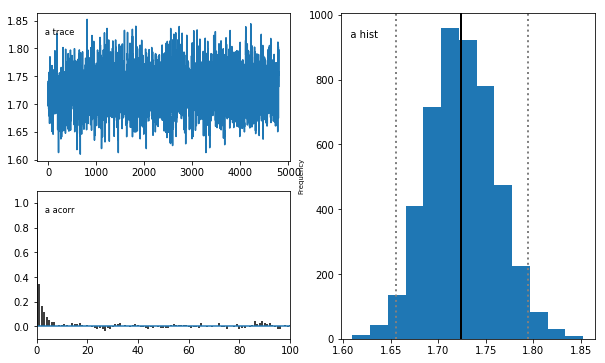

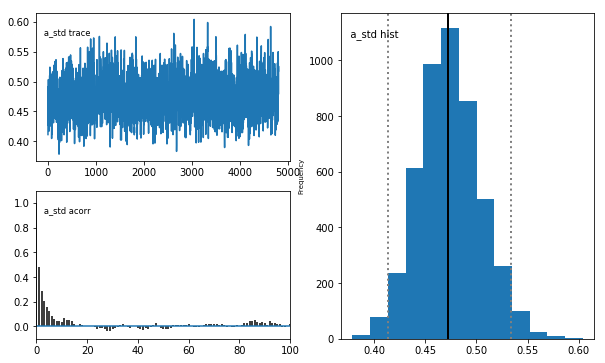

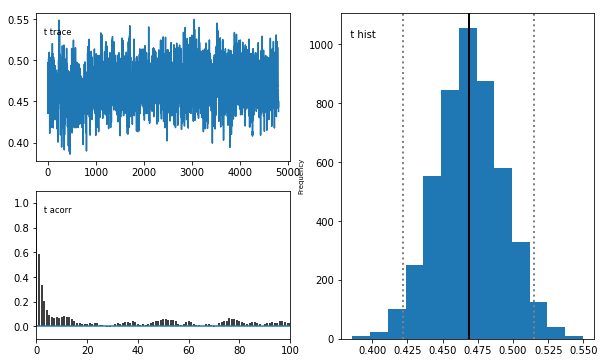

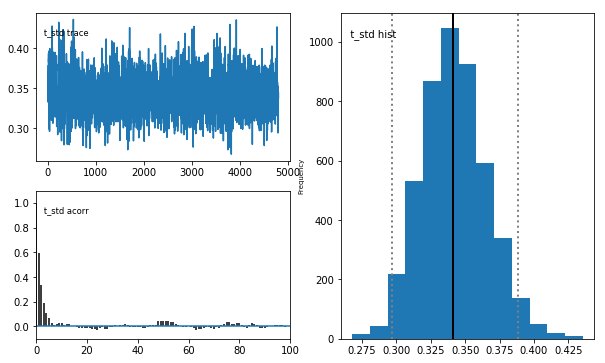

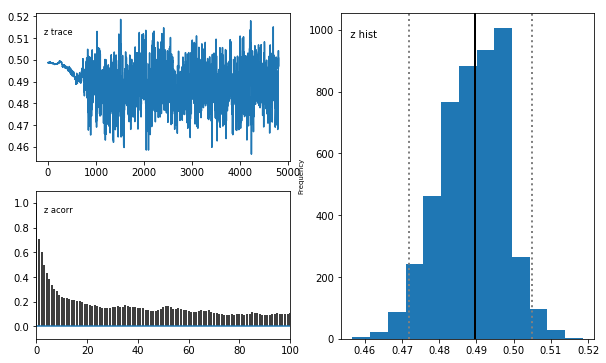

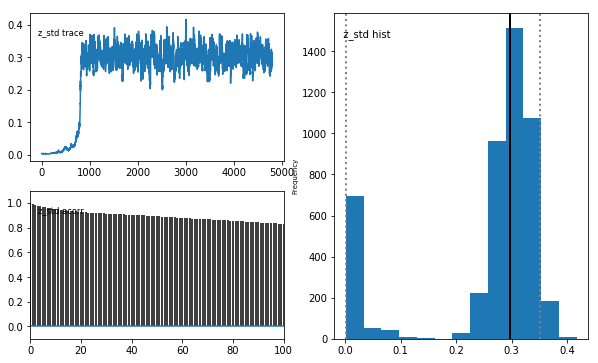

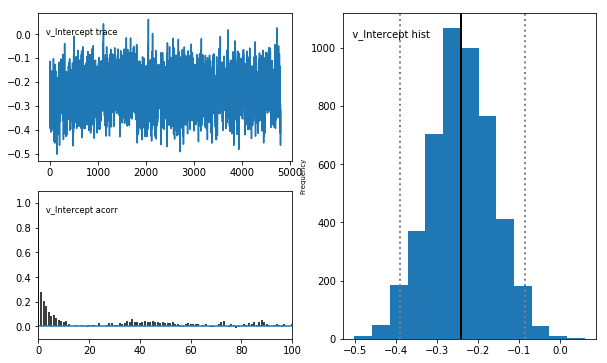

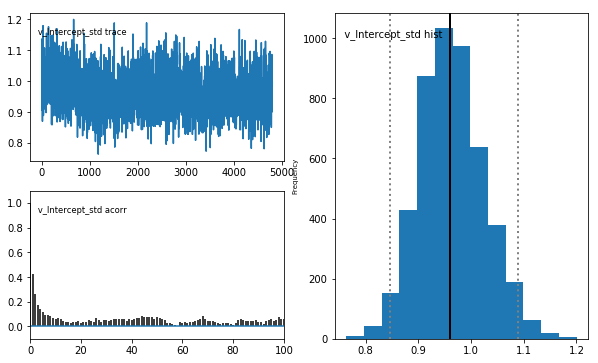

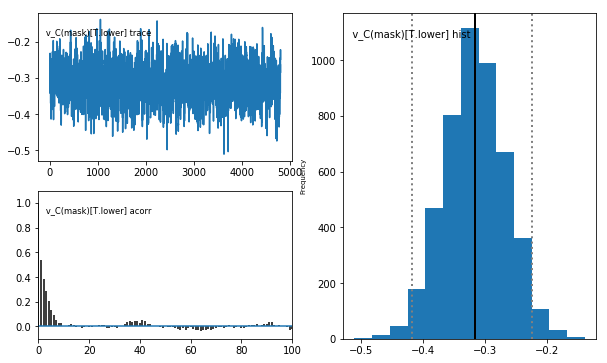

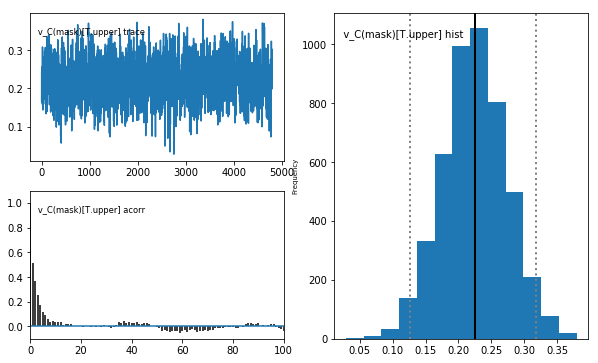

In [8]:
# run model
m_sa.sample(5000, burn=200, dbname='traces.db', db='pickle')
m_sa.print_stats()
m_sa.plot_posteriors()

C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-pack

                                      mean        std       2.5q        25q  \
a                                  1.74399   0.637058    1.65748    1.70085   
a_std                             0.503225   0.931942   0.416857   0.452887   
a_subj.02hcv424u29nd5w             1.82002   0.237479    1.42971    1.65866   
a_subj.02k2uwlhgxnumn9             2.11754   0.273263     1.6453    1.92161   
a_subj.03g7h2hzq4o3g26             1.81292   0.203561    1.46323    1.66712   
a_subj.0nmr75cysk1ae0e             1.78927   0.351993     1.2621    1.55693   
a_subj.0t8qp67pqkw36cb             1.65637    0.22099    1.27304    1.49683   
a_subj.0vfpn4uf3t031qu              1.2005   0.141243   0.962008    1.10001   
a_subj.11dsfdtym1yy5mx             1.75385   0.205508    1.39966    1.60751   
a_subj.1d3dadyu4ekqb4q             1.68323   0.258495    1.27191    1.50359   
a_subj.1mt2emp4645cbl1             2.02123   0.226345    1.63942     1.8649   
a_subj.1rst24mbtgy9rc8              1.7343   0.20269

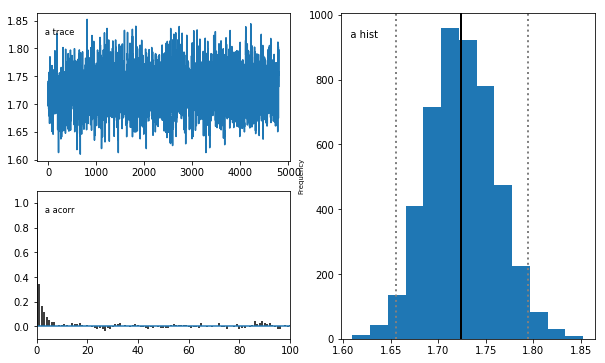

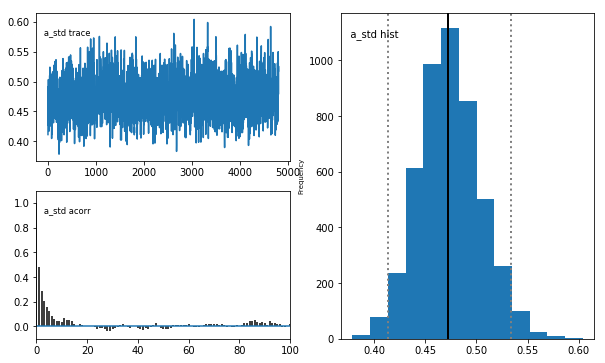

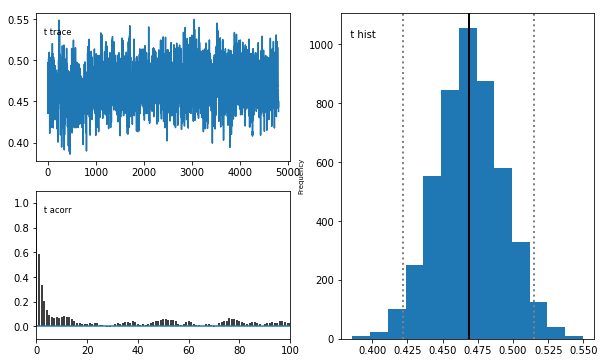

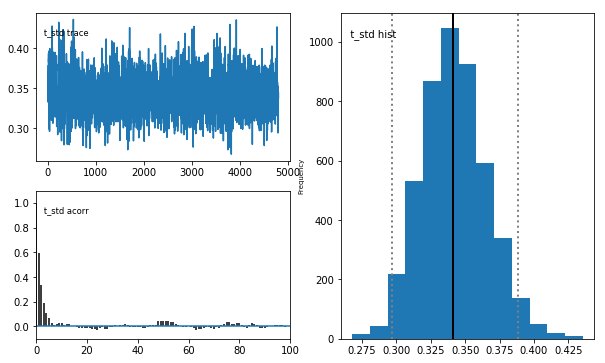

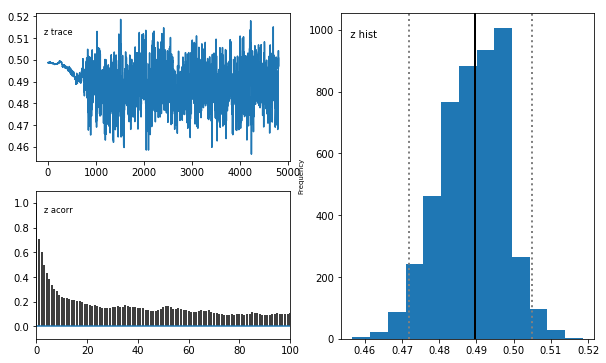

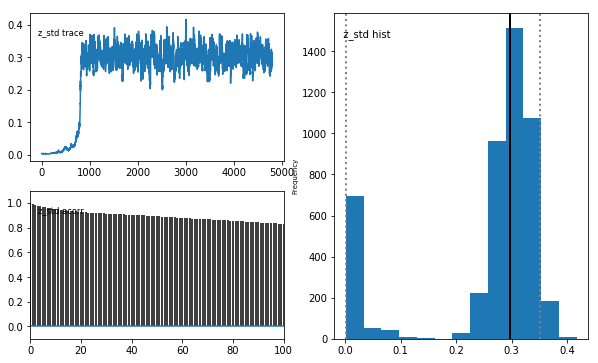

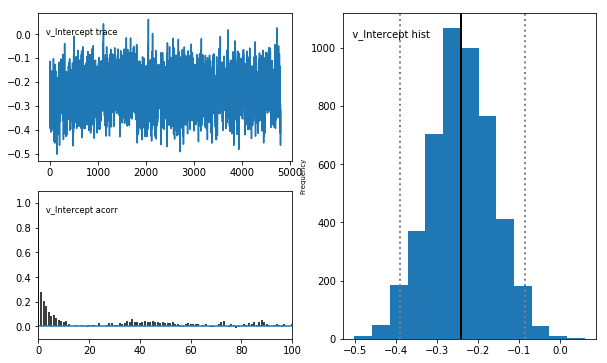

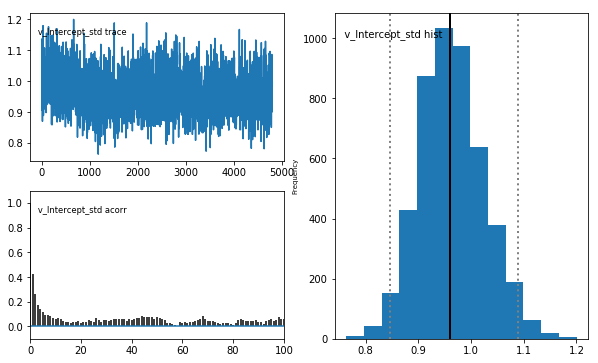

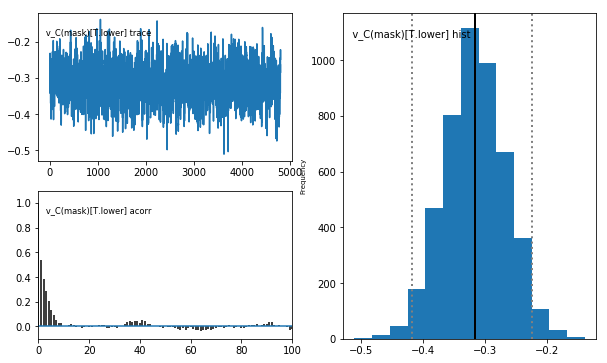

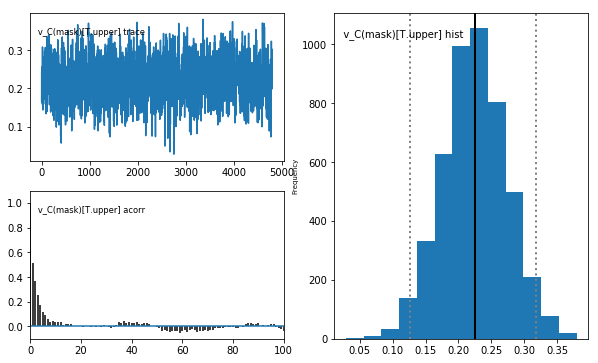

In [9]:
# save model stats
sa_stats = m_sa.gen_stats()
print(sa_stats)
sa_stats.to_csv('_maskFalsePositives/sa_5000/faceMask_hddm_drift_maskFalsePositives_sa_5000.csv', index=True)

# save model posterior plots
m_sa.plot_posteriors(path='_maskFalsePositives/sa_5000/_posteriors', save=True)

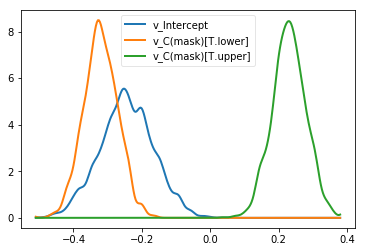

In [11]:
# plot model posteriors by mask
sa_v_none, sa_v_lower, sa_v_upper = m_sa.nodes_db.node[["v_Intercept", "v_C(mask)[T.lower]", "v_C(mask)[T.upper]"]]
hddm.analyze.plot_posterior_nodes([sa_v_none, sa_v_lower, sa_v_upper])
plt.savefig('_maskFalsePositives/sa_5000/faceMask_hddm_drift_maskFalsePositives_sa_5000_v_mask.pdf')

In [13]:
## estimate probabilities that mask coefficient posteriors differ from 0
# note that comparison condition coefficients (i.e. lower/upper) are *relative to* baseline condition (i.e. no mask)
# for lower/upper, =0 means no change from baseline, <0 means less than baseline, and >0 means greater than baseline
# for no mask, =0 means null drift, <0 means negative drift, and >0 means positive drift
print("P(sa_v_none > 0) = ", (sa_v_none.trace() > 0).mean())
print("P(sa_v_lower > 0) = ", (sa_v_lower.trace() > 0).mean())
print("P(sa_v_upper < 0) = ", (sa_v_upper.trace() < 0).mean())
# estimate probability that lower and upper mask coefficient posteriors differ
print("P(sa_v_lower > ad_v_upper) = ", (sa_v_lower.trace() > sa_v_upper.trace()).mean())

P(sa_v_none > 0) =  0.00104166666667
P(sa_v_lower > 0) =  0.0
P(sa_v_upper < 0) =  0.0
P(sa_v_lower > ad_v_upper) =  0.0


In [33]:
# subset dataset by emotion rating type (sad) and facial expression (fearful)
sf_data = data.loc[(data['emotionRating'] == 'sad') & (data['expression'] == 'fearful')]
sf_data.head(10)

subj_idx  block  faceList emotionRating  trial  \
214  gc2le9xecjp1stz      2         1           sad    218   
222  gc2le9xecjp1stz      2         1           sad    226   
230  gc2le9xecjp1stz      2         1           sad    235   
232  gc2le9xecjp1stz      2         1           sad    237   
235  gc2le9xecjp1stz      2         1           sad    240   
241  gc2le9xecjp1stz      2         1           sad    246   
258  gc2le9xecjp1stz      2         1           sad    263   
275  gc2le9xecjp1stz      2         1           sad    280   
277  gc2le9xecjp1stz      2         1           sad    282   
283  gc2le9xecjp1stz      2         1           sad    288   

                stimulus      face  model sex expression      mask  response  \
214  _faces/04_F_F_U.jpg  04_F_F_U      4   F    fearful     upper         0   
222  _faces/22_F_F_X.jpg  22_F_F_X     22   F    fearful  baseline         0   
230  _faces/25_M_F_U.jpg  25_M_F_U     25   M    fearful     upper         1   
232  _faces/25_M_F_L.jpg  25_M_F_L     25   M    fearful     lower         1   
235  _faces/22_F_F_L.jpg  22_F_F_L     22   F    fearful     lower         0   
241  _faces/09_M_F_U.jpg  09_M_F_U      9   M    fearful     upper         0   
258  _faces/46_M_F_X.jpg  46_M_F_X     46   M    fearful  baseline         1   
275  _faces/22_F_F_U.jpg  22_F_F_U     22   F    fearful     upper         0   
277  _faces/56_F_F_X.jpg  56_F_F_X     56   F    fearful  baseline         0   
283  _faces/04_F_F_L.jpg  04_F_F_L      4   F    fearful     lower         0   

           rt  faceAngry  faceDisgusted  faceFearful  faceHappy  faceSad  \
214 -1.367680          0              0           50          0        0   
222 -2.723560          0              0          100          0        0   
230  1.482735          0              0           50          0        0   
232  1.416780          0              0           50          0        0   
235 -2.487510          0              0           50          0        0   
241 -1.001920          0              0           50          0        0   
258  1.056540          0              0          100          0        0   
275 -1.329590          0              0           50          0        0   
277 -1.457625          0              0          100          0        0   
283 -1.241540          0              0           50          0        0   

     faceSurprised  
214              0  
222              0  
230              0  
232              0  
235              0  
241              0  
258              0  
275              0  
277              0  
283              0

In [34]:
# drop any subjects missing columns in design matrix (otherwise produces error)
# none in sf

In [35]:
# define model
m_sf = hddm.HDDMRegressor(sf_data, "v ~ C(mask)", bias=True, p_outlier=0.05)

Adding these covariates:
['v_Intercept', 'v_C(mask)[T.lower]', 'v_C(mask)[T.upper]']


 [-----------------100%-----------------] 5001 of 5000 complete in 50595.5 sec

C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-pack

                                       mean        std        2.5q        25q        50q         75q      97.5q       mc err
a                                   1.77868  0.0574373      1.6964    1.74867    1.77598     1.80479    1.86333   0.00202041
a_std                              0.519354  0.0620826    0.452618   0.493228   0.515744    0.541145   0.590596   0.00236778
a_subj.02hcv424u29nd5w                2.042   0.354853     1.47532    1.79186    2.00196     2.24722    2.82121    0.0123445
a_subj.02k2uwlhgxnumn9              2.29535   0.421003      1.6224    1.99455    2.24213     2.54228    3.24321    0.0121374
a_subj.03g7h2hzq4o3g26              2.70451   0.290617     2.19843    2.49167    2.68606     2.89046    3.33208   0.00623429
a_subj.0nmr75cysk1ae0e              1.96218   0.350229     1.40182       1.72    1.91632     2.16367     2.7556    0.0111048
a_subj.0t8qp67pqkw36cb              1.71818   0.268973     1.27462    1.52498    1.69359     1.88341    2.32334   0.00705684


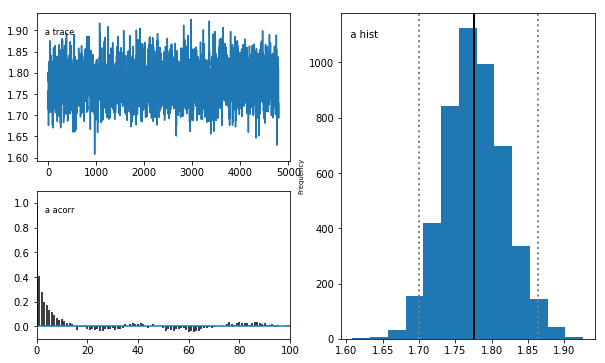

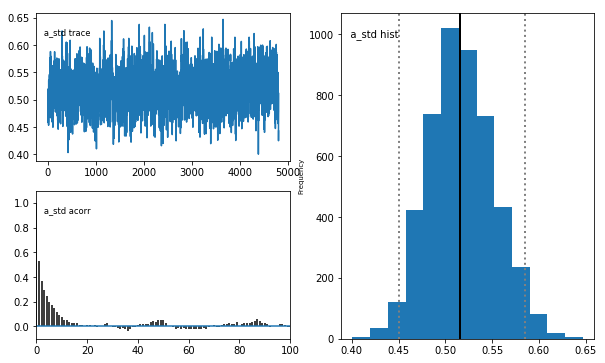

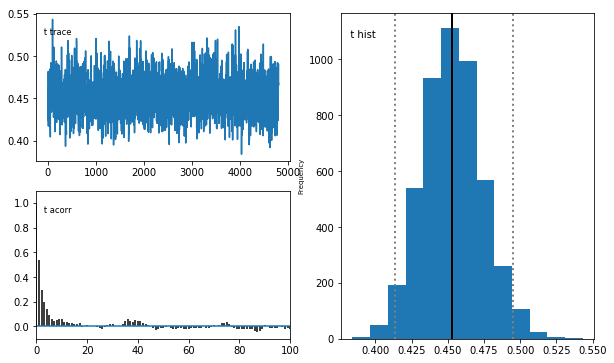

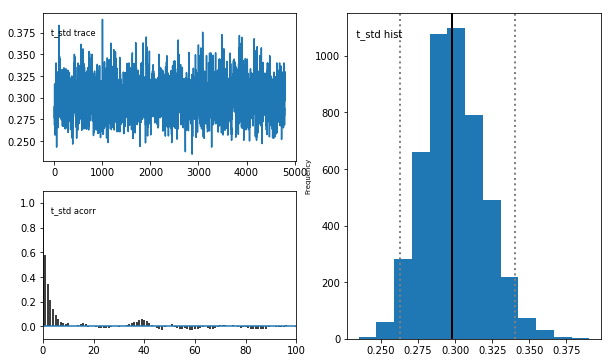

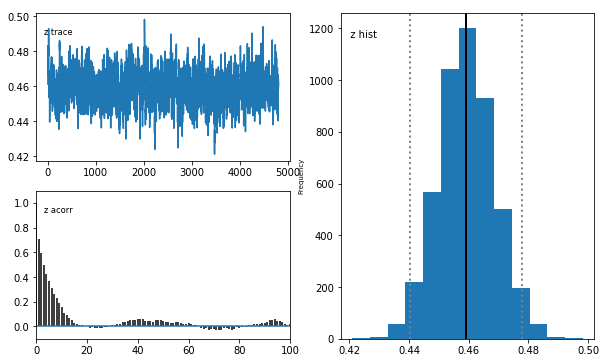

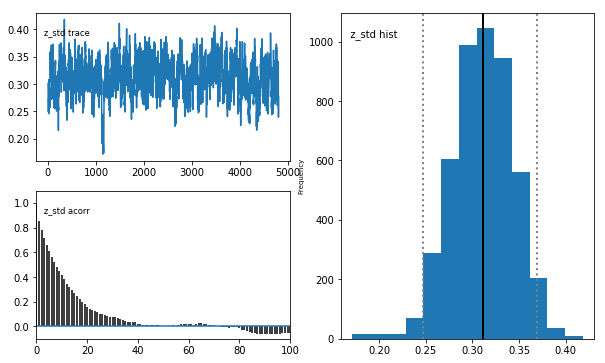

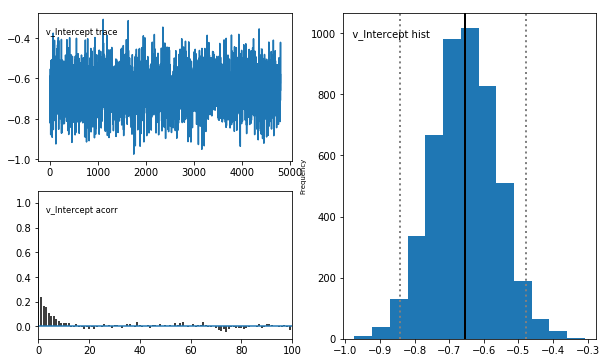

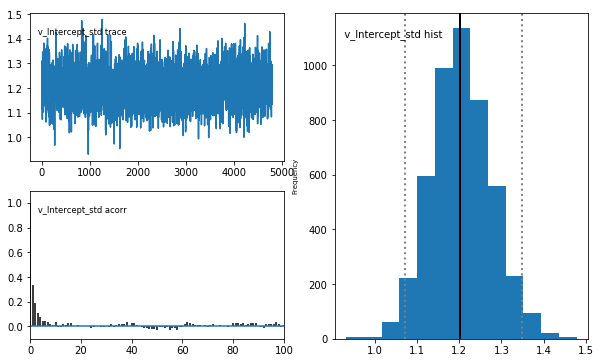

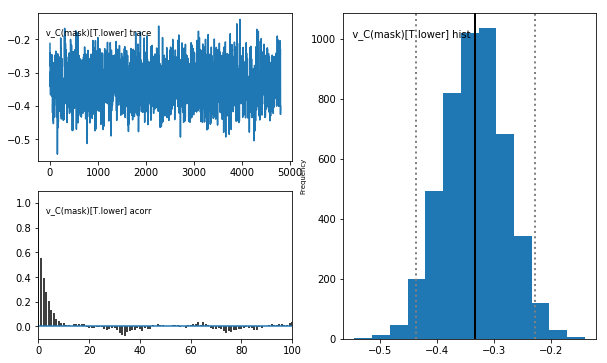

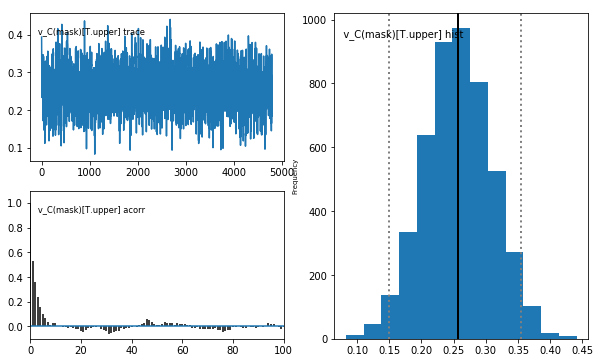

In [38]:
# run model
m_sf.sample(5000, burn=200, dbname='traces.db', db='pickle')
m_sf.print_stats()
m_sf.plot_posteriors()

C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-pack

                                       mean        std       2.5q       25q  \
a                                   1.77868  0.0574373     1.6964   1.74867   
a_std                              0.519354  0.0620826   0.452618  0.493228   
a_subj.02hcv424u29nd5w                2.042   0.354853    1.47532   1.79186   
a_subj.02k2uwlhgxnumn9              2.29535   0.421003     1.6224   1.99455   
a_subj.03g7h2hzq4o3g26              2.70451   0.290617    2.19843   2.49167   
a_subj.0nmr75cysk1ae0e              1.96218   0.350229    1.40182      1.72   
a_subj.0t8qp67pqkw36cb              1.71818   0.268973    1.27462   1.52498   
a_subj.0vfpn4uf3t031qu              1.00481   0.148871   0.755117  0.901161   
a_subj.11dsfdtym1yy5mx               2.1219   0.281424    1.63554   1.91813   
a_subj.1d3dadyu4ekqb4q              1.92873   0.203793    1.56687   1.78767   
a_subj.1mt2emp4645cbl1              2.22806   0.280302    1.75979   2.03656   
a_subj.1rst24mbtgy9rc8              2.15783   0.2324

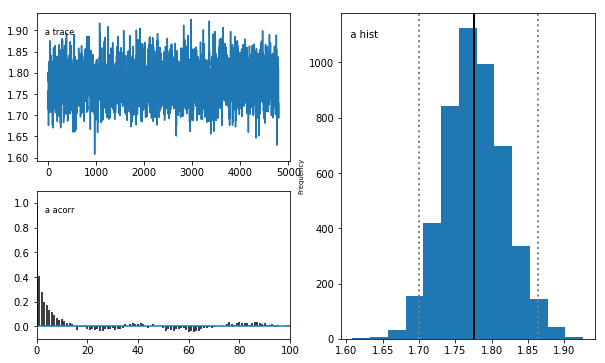

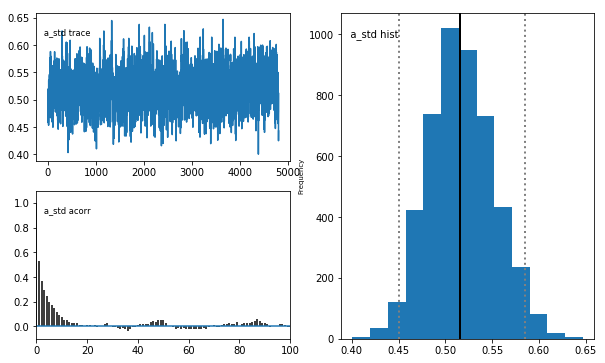

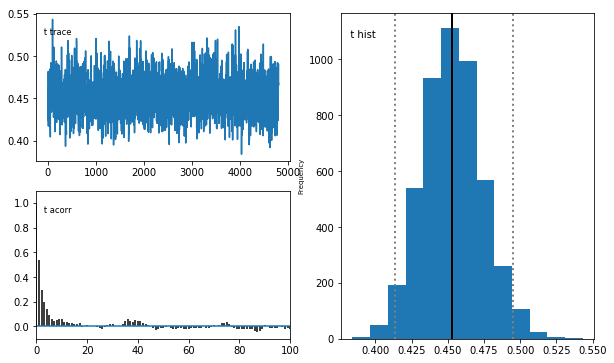

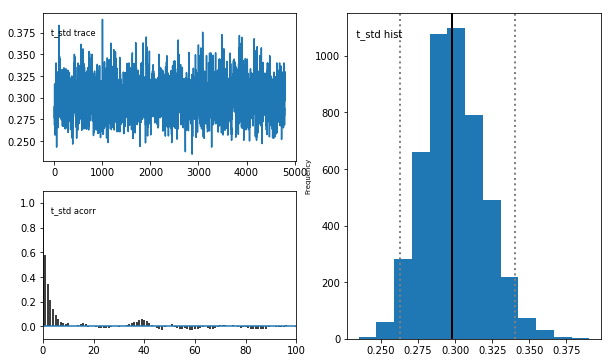

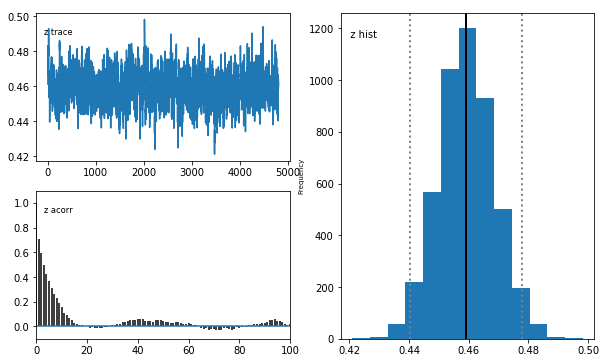

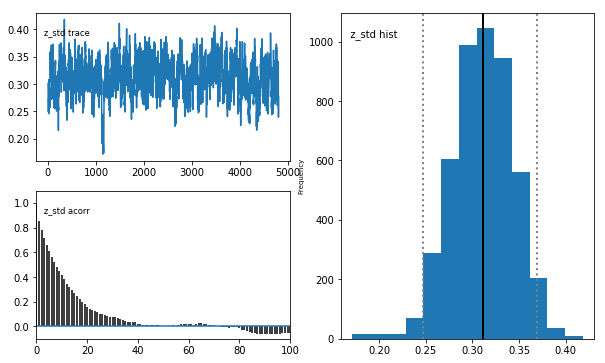

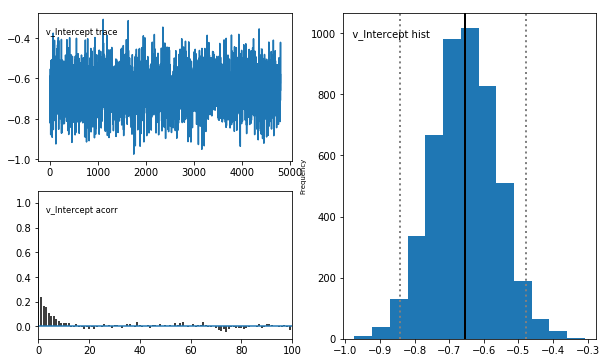

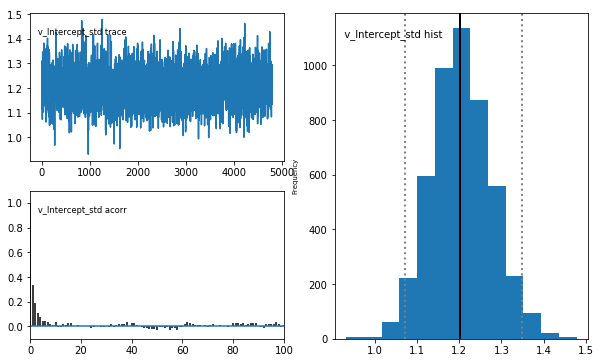

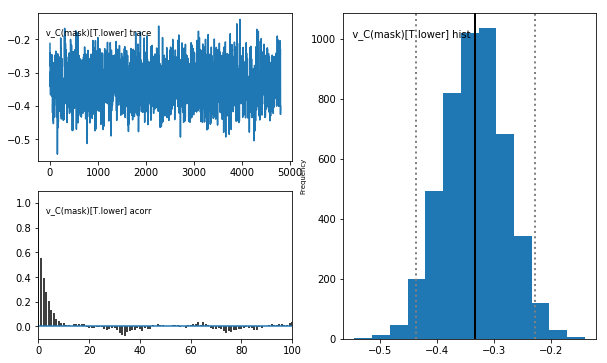

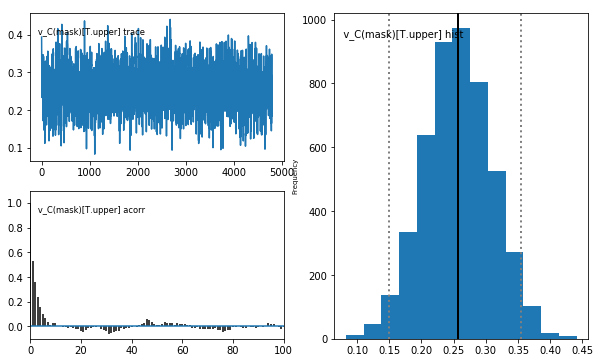

In [39]:
# save model stats
sf_stats = m_sf.gen_stats()
print(sf_stats)
sf_stats.to_csv('_maskFalsePositives/sf_5000/faceMask_hddm_drift_maskFalsePositives_sf_5000.csv', index=True)

# save model posterior plots
m_sf.plot_posteriors(path='_maskFalsePositives/sf_5000/_posteriors', save=True)

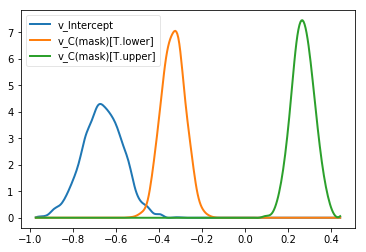

In [40]:
# plot model posteriors by mask
sf_v_none, sf_v_lower, sf_v_upper = m_sf.nodes_db.node[["v_Intercept", "v_C(mask)[T.lower]", "v_C(mask)[T.upper]"]]
hddm.analyze.plot_posterior_nodes([sf_v_none, sf_v_lower, sf_v_upper])
plt.savefig('_maskFalsePositives/sf_5000/faceMask_hddm_drift_maskFalsePositives_sf_5000_v_mask.pdf')

In [41]:
## estimate probabilities that mask coefficient posteriors differ from 0
# note that comparison condition coefficients (i.e. lower/upper) are *relative to* baseline condition (i.e. no mask)
# for lower/upper, =0 means no change from baseline, <0 means less than baseline, and >0 means greater than baseline
# for no mask, =0 means null drift, <0 means negative drift, and >0 means positive drift
print("P(sf_v_none > 0) = ", (sf_v_none.trace() > 0).mean())
print("P(sf_v_lower > 0) = ", (sf_v_lower.trace() > 0).mean())
print("P(sf_v_upper < 0) = ", (sf_v_upper.trace() < 0).mean())
# estimate probability that lower and upper mask coefficient posteriors differ
print("P(sf_v_lower > af_v_upper) = ", (sf_v_lower.trace() > sf_v_upper.trace()).mean())

P(sf_v_none > 0) =  0.0
P(sf_v_lower > 0) =  0.0
P(sf_v_upper < 0) =  0.0
P(sf_v_lower > af_v_upper) =  0.0


In [54]:
# subset dataset by emotion rating type (sad) and facial expression (happy)
sh_data = data.loc[(data['emotionRating'] == 'sad') & (data['expression'] == 'happy')]
sh_data.head(10)

subj_idx  block  faceList emotionRating  trial  \
218  gc2le9xecjp1stz      2         1           sad    222   
233  gc2le9xecjp1stz      2         1           sad    238   
236  gc2le9xecjp1stz      2         1           sad    241   
244  gc2le9xecjp1stz      2         1           sad    249   
245  gc2le9xecjp1stz      2         1           sad    250   
247  gc2le9xecjp1stz      2         1           sad    252   
248  gc2le9xecjp1stz      2         1           sad    253   
251  gc2le9xecjp1stz      2         1           sad    256   
255  gc2le9xecjp1stz      2         1           sad    260   
266  gc2le9xecjp1stz      2         1           sad    271   

                stimulus      face  model sex expression      mask  response  \
218  _faces/47_M_H_L.jpg  47_M_H_L     47   M      happy     lower         0   
233  _faces/57_F_H_U.jpg  57_F_H_U     57   F      happy     upper         1   
236  _faces/47_M_H_X.jpg  47_M_H_X     47   M      happy  baseline         0   
244  _faces/26_F_H_X.jpg  26_F_H_X     26   F      happy  baseline         0   
245  _faces/08_F_H_U.jpg  08_F_H_U      8   F      happy     upper         0   
247  _faces/28_M_H_L.jpg  28_M_H_L     28   M      happy     lower         0   
248  _faces/10_M_H_U.jpg  10_M_H_U     10   M      happy     upper         1   
251  _faces/57_F_H_L.jpg  57_F_H_L     57   F      happy     lower         0   
255  _faces/26_F_H_U.jpg  26_F_H_U     26   F      happy     upper         0   
266  _faces/08_F_H_L.jpg  08_F_H_L      8   F      happy     lower         0   

           rt  faceAngry  faceDisgusted  faceFearful  faceHappy  faceSad  \
218 -1.152365          0              0            0         50        0   
233  1.639980          0              0            0         50        0   
236 -1.327650          0              0            0        100        0   
244 -1.468570          0              0            0        100        0   
245 -1.654100          0              0            0         50        0   
247 -1.231525          0              0            0         50        0   
248  1.257305          0              0            0         50        0   
251 -0.786175          0              0            0         50        0   
255 -0.902230          0              0            0         50        0   
266 -1.006215          0              0            0         50        0   

     faceSurprised  
218              0  
233              0  
236              0  
244              0  
245              0  
247              0  
248              0  
251              0  
255              0  
266              0

In [55]:
# drop any subjects missing columns in design matrix (otherwise produces error)
sh_data = sh_data[(sh_data.subj_idx != 'ygpcur698h4dcw5') & (sh_data.subj_idx != 'as5to7tunoclm8f')]

In [56]:
# define model
m_sh = hddm.HDDMRegressor(sh_data, "v ~ C(mask)", bias=True, p_outlier=0.05)

Adding these covariates:
['v_Intercept', 'v_C(mask)[T.lower]', 'v_C(mask)[T.upper]']


 [-----------------100%-----------------] 5001 of 5000 complete in 53397.7 sec

C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-pack

                                       mean        std        2.5q        25q        50q        75q      97.5q       mc err
a                                   2.13201   0.406716     1.98051    2.06748    2.11243    2.16228    2.26583    0.0166789
a_std                              0.774407   0.624264    0.633525   0.706942   0.747954   0.788748   0.886341     0.024354
a_subj.02hcv424u29nd5w              1.86836   0.299674     1.38701    1.64938    1.83386    2.05131    2.54175   0.00906071
a_subj.02k2uwlhgxnumn9              2.56857   0.669881      1.5098    2.11238    2.47864    2.93212    4.08179     0.034418
a_subj.03g7h2hzq4o3g26              2.65158   0.565994     1.77471    2.24724    2.56997    2.97133    3.98243    0.0231251
a_subj.0nmr75cysk1ae0e              2.35714    0.28566     1.86065    2.15562    2.33729    2.54256    2.96186   0.00689825
a_subj.0t8qp67pqkw36cb              1.69405    0.51646    0.975241    1.34217    1.60608    1.93541    2.98409    0.0243501
a_subj.0

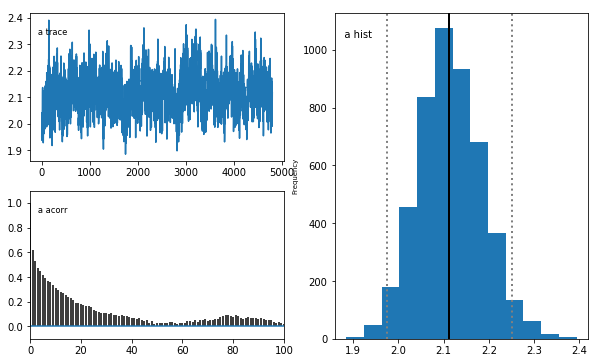

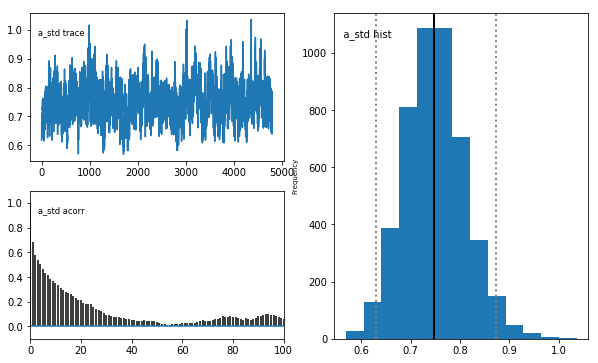

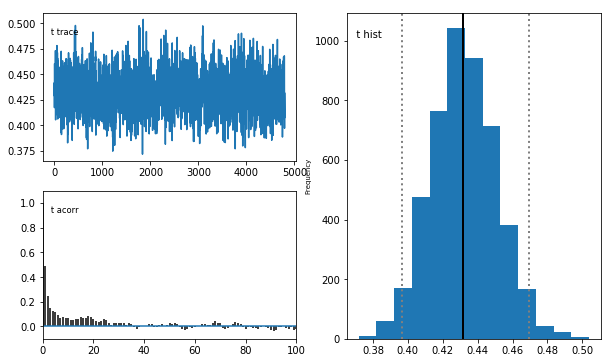

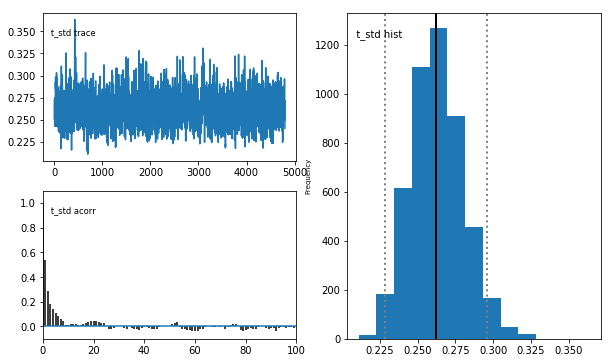

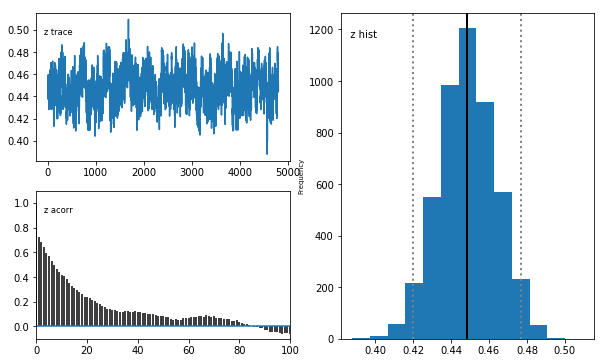

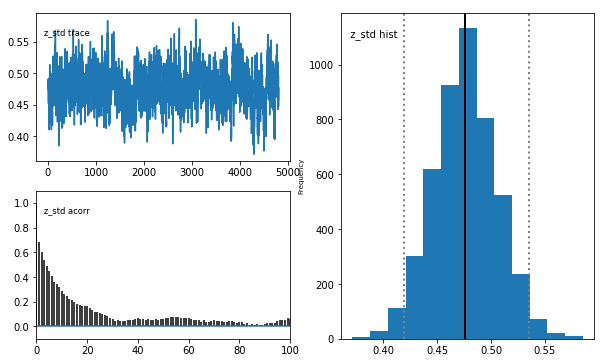

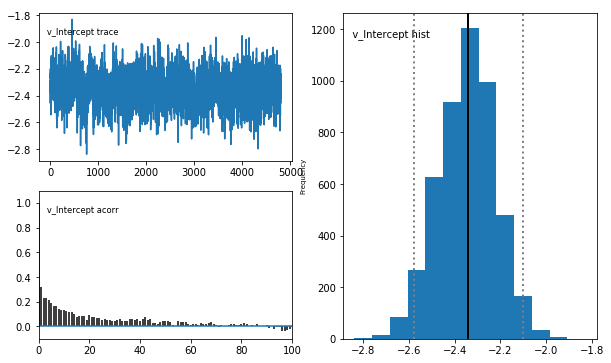

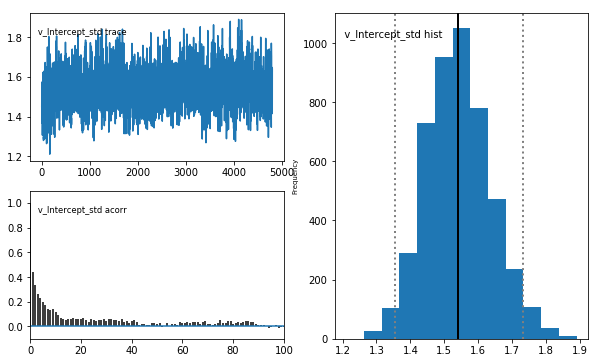

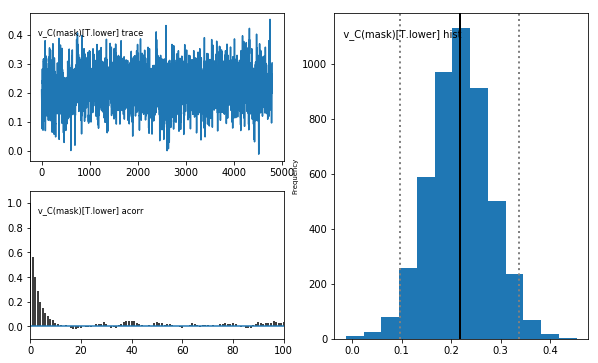

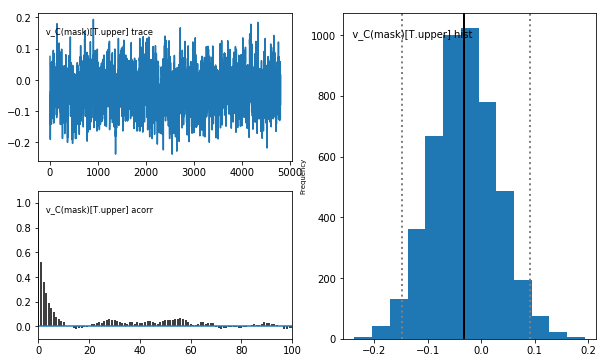

In [58]:
# run model
m_sh.sample(5000, burn=200, dbname='traces.db', db='pickle')
m_sh.print_stats()
m_sh.plot_posteriors()

C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-pack

                                       mean        std       2.5q        25q  \
a                                   2.13201   0.406716    1.98051    2.06748   
a_std                              0.774407   0.624264   0.633525   0.706942   
a_subj.02hcv424u29nd5w              1.86836   0.299674    1.38701    1.64938   
a_subj.02k2uwlhgxnumn9              2.56857   0.669881     1.5098    2.11238   
a_subj.03g7h2hzq4o3g26              2.65158   0.565994    1.77471    2.24724   
a_subj.0nmr75cysk1ae0e              2.35714    0.28566    1.86065    2.15562   
a_subj.0t8qp67pqkw36cb              1.69405    0.51646   0.975241    1.34217   
a_subj.0vfpn4uf3t031qu              1.91499   0.603399    1.02615    1.49311   
a_subj.11dsfdtym1yy5mx              2.06135   0.337237    1.51453    1.81943   
a_subj.1d3dadyu4ekqb4q              1.45257   0.171135    1.15118    1.33263   
a_subj.1mt2emp4645cbl1                3.126   0.662184    2.11145    2.64854   
a_subj.1rst24mbtgy9rc8              2.30

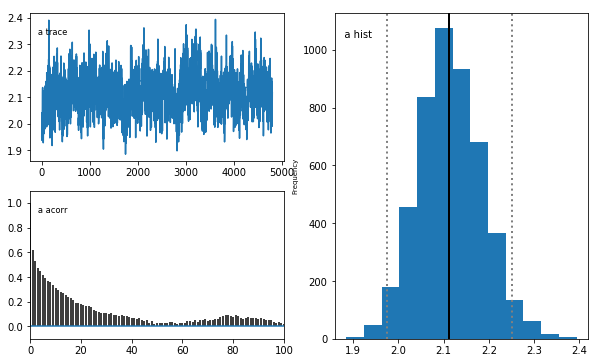

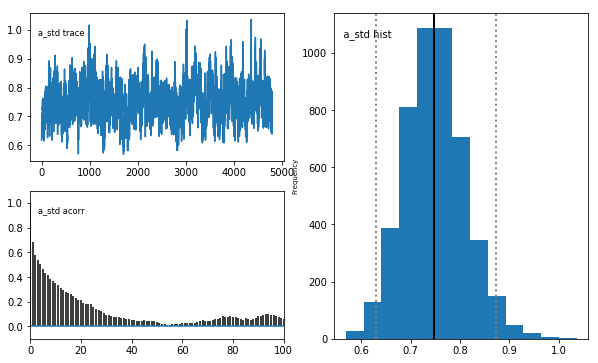

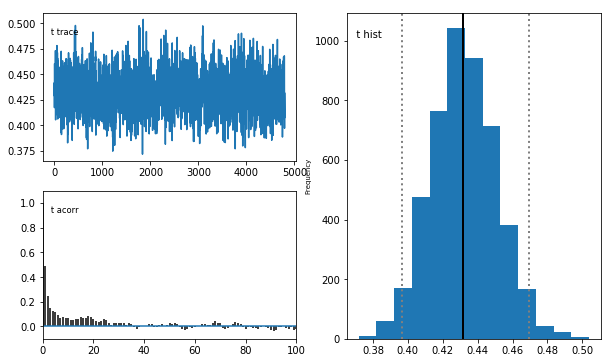

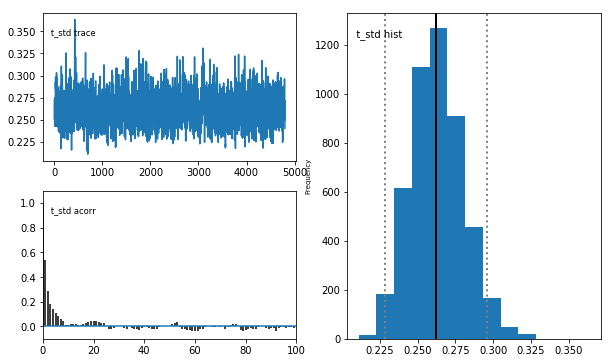

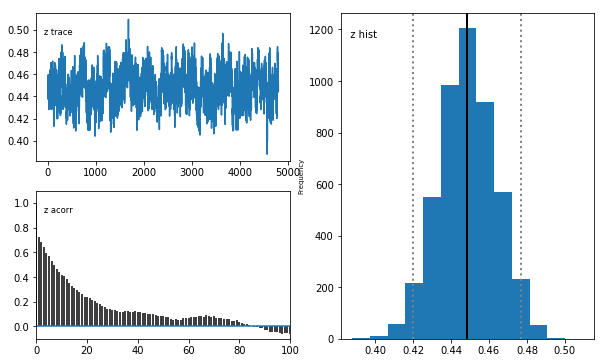

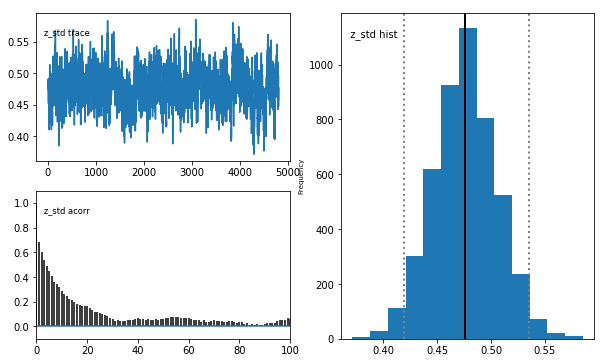

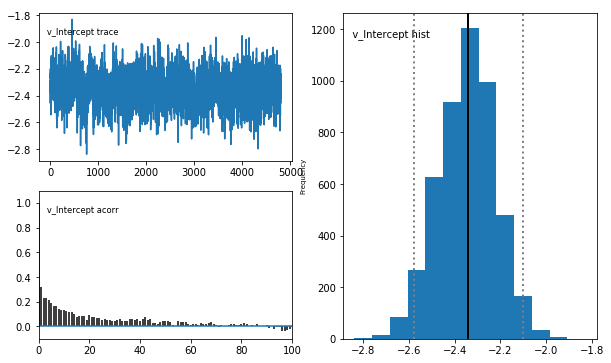

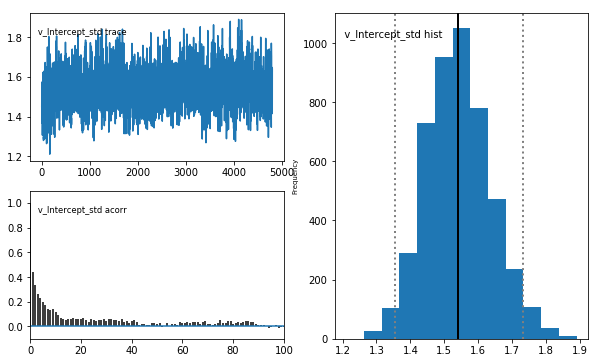

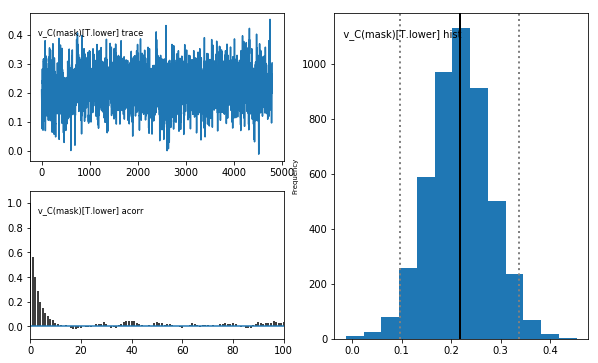

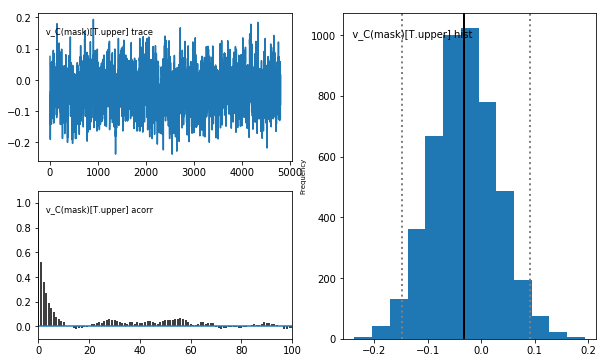

In [59]:
# save model stats
sh_stats = m_sh.gen_stats()
print(sh_stats)
sh_stats.to_csv('_maskFalsePositives/sh_5000/faceMask_hddm_drift_maskFalsePositives_sh_5000.csv', index=True)

# save model posterior plots
m_sh.plot_posteriors(path='_maskFalsePositives/sh_5000/_posteriors', save=True)

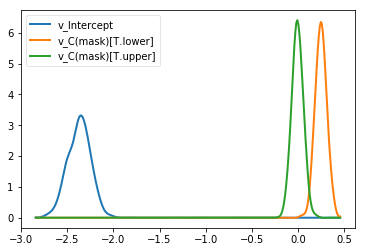

In [60]:
# plot model posteriors by mask
sh_v_none, sh_v_lower, sh_v_upper = m_sh.nodes_db.node[["v_Intercept", "v_C(mask)[T.lower]", "v_C(mask)[T.upper]"]]
hddm.analyze.plot_posterior_nodes([sh_v_none, sh_v_lower, sh_v_upper])
plt.savefig('_maskFalsePositives/sh_5000/faceMask_hddm_drift_maskFalsePositives_sh_5000_v_mask.pdf')

In [62]:
## estimate probabilities that mask coefficient posteriors differ from 0
# note that comparison condition coefficients (i.e. lower/upper) are *relative to* baseline condition (i.e. no mask)
# for lower/upper, =0 means no change from baseline, <0 means less than baseline, and >0 means greater than baseline
# for no mask, =0 means null drift, <0 means negative drift, and >0 means positive drift
print("P(sh_v_none > 0) = ", (sh_v_none.trace() > 0).mean())
print("P(sh_v_lower < 0) = ", (sh_v_lower.trace() < 0).mean())
print("P(sh_v_upper > 0) = ", (sh_v_upper.trace() > 0).mean())
# estimate probability that lower and upper mask coefficient posteriors differ
print("P(sh_v_lower < af_v_upper) = ", (sh_v_lower.trace() < sh_v_upper.trace()).mean())

P(sh_v_none > 0) =  0.0
P(sh_v_lower < 0) =  0.000416666666667
P(sh_v_upper > 0) =  0.29875
P(sh_v_lower < af_v_upper) =  0.0
